In [1]:
import csv as csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [146]:
pwd

'C:\\Users\\BrendanHutchinson\\NYCDSA\\Projects\\Real-Estate-Project-1'

In [147]:
pd.set_option("display.max_rows", 10, "display.max_columns", 20)

In [148]:
df = pd.read_csv('./data/City_Zhvi_SingleFamilyResidence.csv')

In [149]:
df1 = df.drop(df.iloc[:,9:299] ,axis =1)

In [150]:
df1 = df1.sort_values(['2020-03-31', 'SizeRank'] ,ascending=True)

In [151]:
df1 = df1.drop(['RegionID', 'SizeRank', 'StateName', 'Metro', 'Unnamed: 0', 'RegionType'] ,axis = 1)

In [152]:
df1 = df1.rename(columns = {'2020-03-31':'median_home_price_2020'})

In [153]:
df = pd.read_csv('./data/City_Zri_SingleFamilyResidenceRental.csv')
df.shape

(12413, 111)

In [154]:
df = df.drop(df.iloc[:,7:110] ,axis =1)

In [155]:
df2 = df.sort_values('2019-06', ascending=True)

In [156]:
df2 = df2.drop(['SizeRank', 'RegionID', 'Metro', 'Unnamed: 0'], axis = 1)

In [157]:
df2 = df2.rename(columns = {'2019-06':'median_rental_price_2019'})

In [158]:
df3 = pd.merge(df1, df2, on = ['State', 'RegionName'], how='inner')

In [159]:
df3 = df3.drop('CountyName_y', axis=1).rename({'CountyName_x': 'CountyName'}, axis=1)

In [160]:
df3 = df3.sort_values('median_rental_price_2019',ascending = False)

In [161]:
def min_rent_calc(home_value):
    if home_value >= 3000000:
        return home_value * .005
    else:
        return home_value * .01

In [162]:
# Set equal to min_rent_price column
df3['min_monthly_rent'] = df3['median_home_price_2020'].apply(min_rent_calc)

In [163]:
df3[df3['median_rental_price_2019'] > df3['min_monthly_rent']]

,RegionName,State,CountyName,median_home_price_2020,median_rental_price_2019,min_monthly_rent
11215,Snowmass Village,CO,Pitkin County,3207586.0,19952,16037.93
5827,Belle Haven,VA,Accomack County,213255.0,3055,2132.55
1030,Salisbury,NY,Herkimer County,96913.0,3046,969.13
5738,Northampton,PA,Northampton County,210775.0,2538,2107.75
540,Rose Hill,VA,Lee County,79915.0,2503,799.15
...,...,...,...,...,...,...
3,Flint,MI,Genesee County,24605.0,604,246.05
29,West End-Cobb Town,AL,Calhoun County,31429.0,603,314.29
39,Taft,OK,Muskogee County,34677.0,598,346.77
9,East Conemaugh,PA,Cambria County,29157.0,597,291.57


In [164]:
df3['profit'] = df3['min_monthly_rent'] - df3['median_rental_price_2019']

In [165]:
df3['Region'] = [region_name + ', ' + state for region_name, state in zip(df3['RegionName'], df3['State'])] 

In [166]:
df3[df3.profit > 0].sort_values('profit', ascending=False)

,RegionName,State,CountyName,median_home_price_2020,median_rental_price_2019,min_monthly_rent,profit,Region
11211,Saratoga,CA,Santa Clara County,2898007.0,6420,28980.07,22560.07,"Saratoga, CA"
11212,Medina,WA,King County,2990904.0,8252,29909.04,21657.04,"Medina, WA"
11213,Yarrow Point,WA,King County,2991391.0,8475,29913.91,21438.91,"Yarrow Point, WA"
11210,Clyde Hill,WA,King County,2846520.0,8114,28465.20,20351.20,"Clyde Hill, WA"
11204,Menlo Park,CA,San Mateo County,2577119.0,5860,25771.19,19911.19,"Menlo Park, CA"
...,...,...,...,...,...,...,...,...
744,Calumet,MI,Houghton County,86620.0,865,866.20,1.20,"Calumet, MI"
1554,Dublin,TX,Erath County,112187.0,1121,1121.87,0.87,"Dublin, TX"
597,Talladega,AL,Talladega County,81967.0,819,819.67,0.67,"Talladega, AL"
1538,Marianna,FL,Jackson County,111842.0,1118,1118.42,0.42,"Marianna, FL"


In [191]:
df3[df3.profit > 0].sort_values('profit', ascending=False).head(10).mean()

median_home_price_2020      3.115650e+06
median_rental_price_2019    8.058200e+03
min_monthly_rent            2.782501e+04
profit                      1.976681e+04
monthly_Mortgage_payment    1.399066e+04
Montly_Mortgate_Profit      9.932459e+03
dtype: float64

Text(0, 0.5, 'Profit')

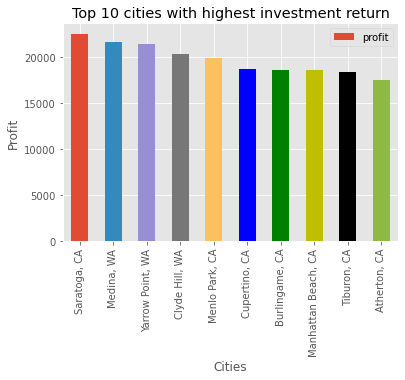

In [183]:
df3[df3.profit > 0].sort_values('profit', ascending=False).head(10).plot(kind='bar', x='Region', y='profit',color=['C0', 'C1', 'C2', 'C3', 'C4','b','g','y','k','C5'])
plt.title("Top 10 cities with highest investment return")
plt.xlabel("Cities")
plt.ylabel("Profit")

In [195]:
df3.groupby(['State'])['profit'].median().sort_values(ascending = False).head(10).mean()

2437.938

Text(0, 0.5, 'Profit')

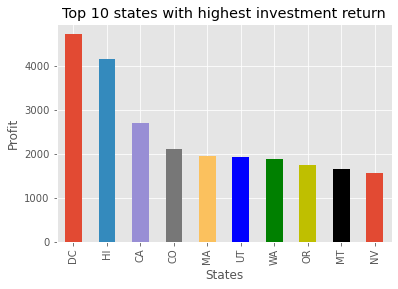

In [181]:
df3.groupby(['State'])['profit'].median().sort_values(ascending = False).head(10).plot(kind='bar', x='State', y='profit',color=['C0', 'C1', 'C2', 'C3', 'C4','b',  'g', 'y', 'k'])
plt.title("Top 10 states with highest investment return")
plt.xlabel("States")
plt.ylabel("Profit")

In [196]:
df3[df3.median_home_price_2020 < 500000].groupby('State').head(10).sort_values('profit', ascending=False).mean()

median_home_price_2020      368205.622000
median_rental_price_2019      2040.104000
min_monthly_rent              3682.056220
profit                        1641.952220
monthly_Mortgage_payment      1653.407786
Montly_Mortgate_Profit        3613.303786
dtype: float64

Text(0, 0.5, 'Profit')

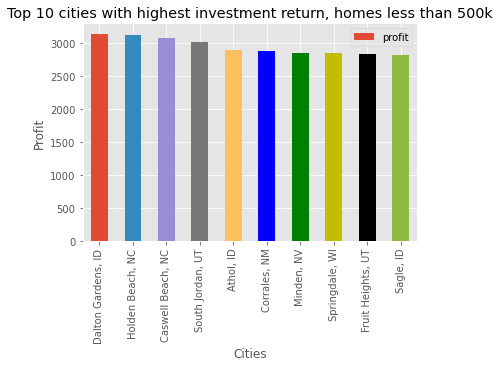

In [180]:
df3[df3.median_home_price_2020 < 500000].groupby('State').head(10).sort_values('profit', ascending=False).head(10).plot(kind = 'bar',x='Region', y='profit',color=['C0', 'C1', 'C2', 'C3', 'C4','b','g','y','k','C5'])
plt.title("Top 10 cities with highest investment return, homes less than 500k")
plt.xlabel("Cities")
plt.ylabel("Profit")

In [170]:
interest = 0.035 / 12               
thirty_year = 30 * 12 
fifteen_year = 15 * 12 
price = 737939.0  

In [171]:
def MortgagePayment (p,i,n):
    return p*(i*(1 + i)**n)/((1 + i)**n-1)

In [201]:
MortgagePayment(3000000,interest,thirty_year)

13471.340634264703

In [202]:
.005 * 3000000


15000.0

In [172]:
price = df3['median_home_price_2020']

In [173]:
df3['monthly_Mortgage_payment'] = MortgagePayment(price, interest, thirty_year)

In [174]:
df3['Montly_Mortgate_Profit'] = df3.monthly_Mortgage_payment - df3.median_rental_price_2019 + 4000

In [197]:
df3.groupby(['State'])['Montly_Mortgate_Profit'].median().sort_values(ascending = False).head(10).mean()

4064.7097020749156

Text(0, 0.5, 'Profit')

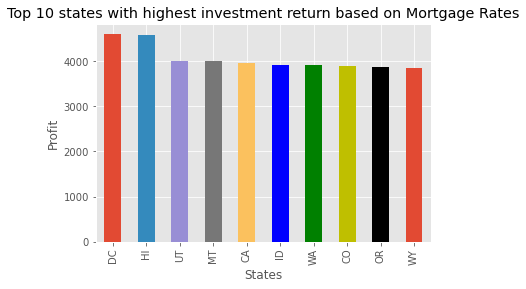

In [177]:
df3.groupby(['State'])['Montly_Mortgate_Profit'].median().sort_values(ascending = False).head(10).plot(kind='bar', x='State', y='profit',color=['C0', 'C1', 'C2', 'C3', 'C4','b',  'g', 'y', 'k'])
plt.title("Top 10 states with highest investment return based on Mortgage Rates")
plt.xlabel("States")
plt.ylabel("Profit")

In [198]:
df3.groupby(['Region'])['Montly_Mortgate_Profit'].median().sort_values(ascending = False).head(10).mean()

12595.321640803257

Text(0, 0.5, 'Profit')

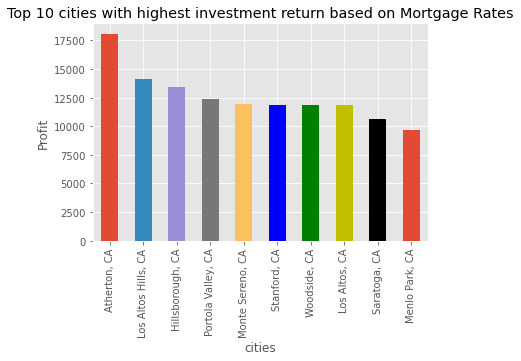

In [184]:
df3.groupby(['Region'])['Montly_Mortgate_Profit'].median().sort_values(ascending = False).head(10).plot(kind='bar', x='State', y='profit',color=['C0', 'C1', 'C2', 'C3', 'C4','b',  'g', 'y', 'k'])
plt.title("Top 10 cities with highest investment return based on Mortgage Rates")
plt.xlabel("cities")
plt.ylabel("Profit")